##**Ejemplos de Aplicación - Semana 10**

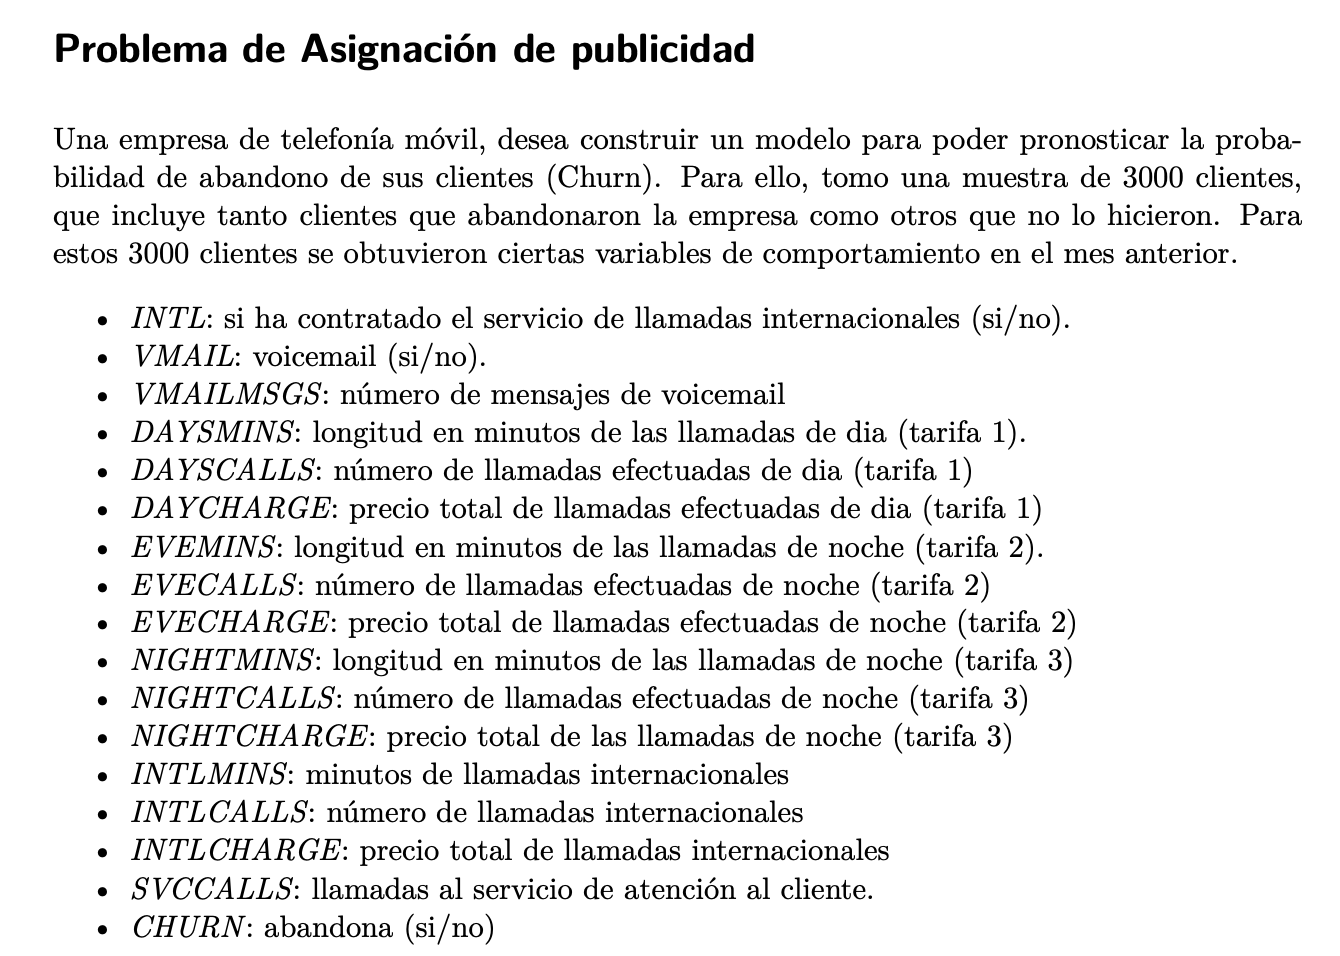

In [1]:
# Para importar datos de excel
library(readxl)
# Para graficos más profesionales
library(ggplot2)
# Librerias
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
datos <- read_excel("Ejemplo_Aplicacion_Regresion_Logistica_1.xlsx",
                      sheet = "Problema1")

In [18]:
head(datos)

AccountLength,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


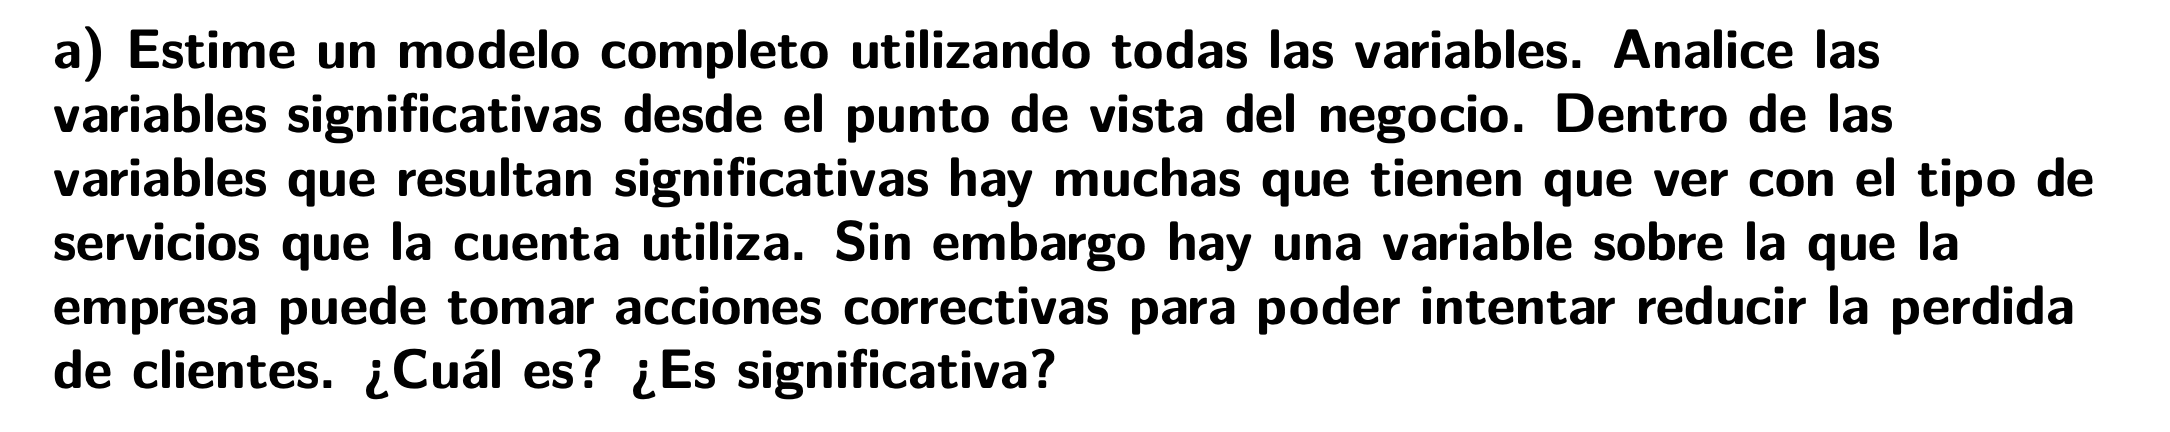

> La variable de cantidad de veces que el cliente llamo al customer service es clave para tomar acciones correctivas sobre el problema

In [7]:
m1 <- glm(Churn ~ ., data = datos, family = binomial)
summary(m1)


Call:
glm(formula = Churn ~ ., family = binomial, data = datos)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -8.6515638  0.7243142 -11.944  < 2e-16 ***
AccountLength  0.0008458  0.0013912   0.608 0.543199    
IntlPlanyes    2.0427543  0.1454974  14.040  < 2e-16 ***
VMailPlanyes  -2.0250146  0.5740840  -3.527 0.000420 ***
VMailMessage   0.0358803  0.0180108   1.992 0.046355 *  
DayMins       -0.2441993  3.2742224  -0.075 0.940547    
DayCalls       0.0031962  0.0027612   1.158 0.247048    
DayCharge      1.5127081 19.2601862   0.079 0.937398    
EveMins        0.8186945  1.6357258   0.501 0.616717    
EveCalls       0.0010579  0.0027826   0.380 0.703817    
EveCharge     -9.5463678 19.2437266  -0.496 0.619840    
NightMins     -0.1238287  0.8764906  -0.141 0.887650    
NightCalls     0.0006993  0.0028419   0.246 0.805628    
NightCharge    2.8338084 19.4769043   0.145 0.884319    
IntlMins      -4.3377914  5.3009719  -0.818 0.413185    
IntlCall

> Vemos, a partir del summary del modelo, que la variable **"CustServCalls"** es muy significativa

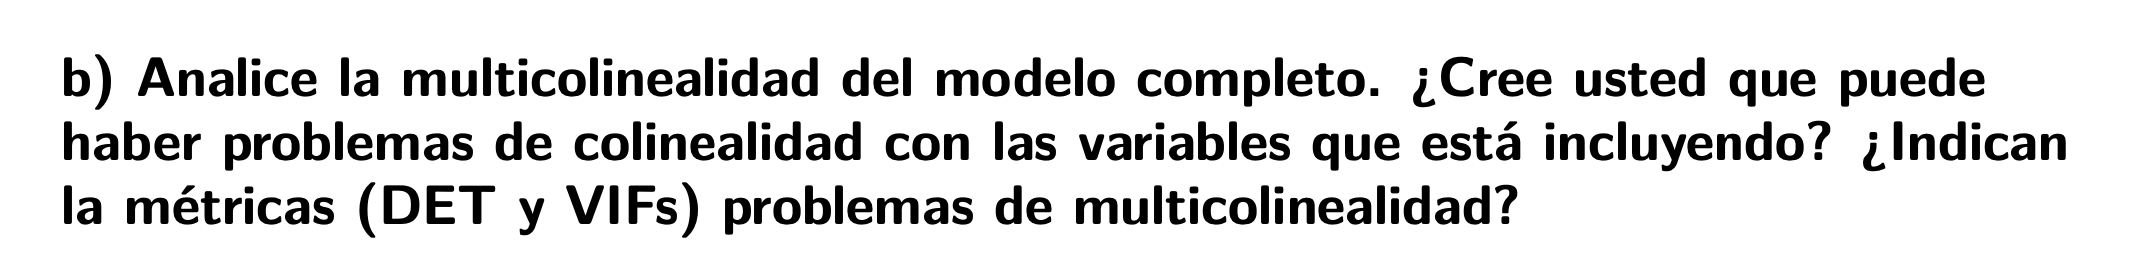

In [11]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




### DET

In [14]:
mm <- model.matrix(m1)
det(cor(mm[,-1]))

[1] 7.989444e-26

> *Segun GPT: Determinante (DET):*
*En la salida de un modelo de regresión, el determinante de la matriz de correlación entre las variables predictoras (X) puede ser una indicación de multicolinealidad. Si el determinante es cercano a cero, indica que las variables predictoras están altamente correlacionadas.*

> Por lo tanto, como el determinante es muy bajo (casi cero) podemos decir que este modelo tiene problemas de colinealidad

### VIF

Factor de Inflación de la Varianza (VIF):
El VIF mide cuánto aumenta la varianza de un coeficiente de regresión debido a la multicolinealidad. Un VIF mayor que 5 o 10 a menudo se considera indicativo de multicolinealidad problemática.
Puedes calcular el VIF para cada variable predictora por separado utilizando la función vif() del paquete car en R.

In [16]:
library(car)
vif(m1)

AccountLength      IntlPlan     VMailPlan  VMailMessage       DayMins 
 1.004575e+00  1.071003e+00  1.588375e+01  1.584485e+01  9.564603e+06 
     DayCalls     DayCharge       EveMins      EveCalls     EveCharge 
 1.005929e+00  9.564622e+06  2.108808e+06  1.002645e+00  2.108811e+06 
    NightMins    NightCalls   NightCharge      IntlMins     IntlCalls 
 6.325848e+05  1.005073e+00  6.325833e+05  6.858342e+04  1.012819e+00 
   IntlCharge CustServCalls 
 6.858494e+04  1.088519e+00

**Vemos que las variables**

- VMailPlan -- 15.88
- VMailMessage -- 15.84

- DayMins -- 9564603.4
- DayCharge -- 9564621.9

- EveMins --  2108807.6
- EveCharge -- 2108810.9

- NightMins -- 632584.8
- NightCharge --  632583.3

- IntlMins --  68583.42
- IntlCharge --  68584.9

Tienen problemas de colinealidad, con impacto sobre la varianza muy similar de a pares. PERO OJO, esto no significa que las variables sean LD entre pares por tener VIFs similares / iguales (aunque en este caso sea probable por la naturaleza de las vars del problema).

Lo que se deberia hacer para reducir la MC es ir retirando de a una (ceteris paribus) las vars que tienen alto VIF (empezando por el de mayor VIF) hasta que el resto de variables (y el det) lleguen a valores aceptables que no indiquen MC.

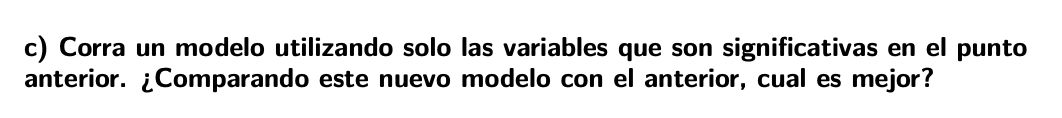

Vars significativas para mi modelo y sus pvalues

- IntlPlanyes   --  < 2e-16 ***
- VMailPlanyes  -- 0.000420 ***
- VMailMessage  -- 0.046355 *  
- IntlCalls     -- 0.000207 ***
- CustServCalls -- < 2e-16 *

In [23]:
m2 <- glm(Churn ~ IntlPlan + VMailPlan + VMailMessage + IntlCalls + CustServCalls, data = datos, family = binomial)
summary(m2)


Call:
glm(formula = Churn ~ IntlPlan + VMailPlan + VMailMessage + IntlCalls + 
    CustServCalls, family = binomial, data = datos)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.36521    0.13940 -16.967  < 2e-16 ***
IntlPlanyes    1.96565    0.13593  14.460  < 2e-16 ***
VMailPlanyes  -1.80586    0.53404  -3.382 0.000721 ***
VMailMessage   0.03227    0.01678   1.924 0.054411 .  
IntlCalls     -0.07540    0.02346  -3.214 0.001307 ** 
CustServCalls  0.44178    0.03654  12.090  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2758.3  on 3332  degrees of freedom
Residual deviance: 2382.1  on 3327  degrees of freedom
AIC: 2394.1

Number of Fisher Scoring iterations: 5


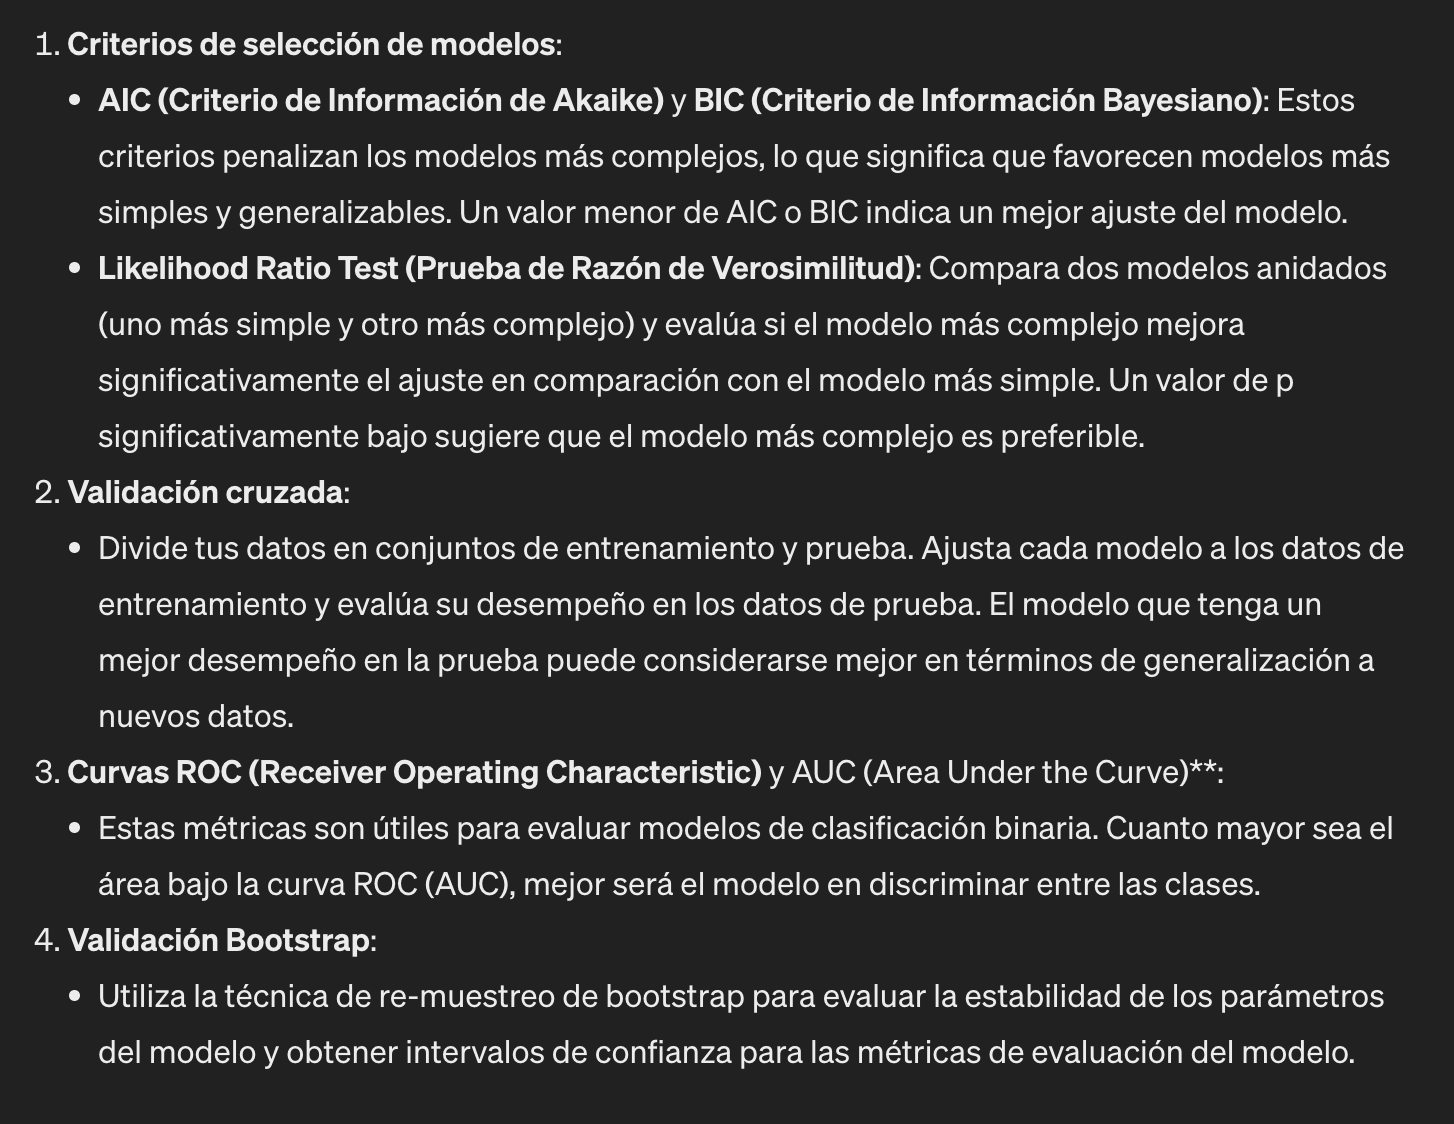


Analizando el AIC del primer modelo:

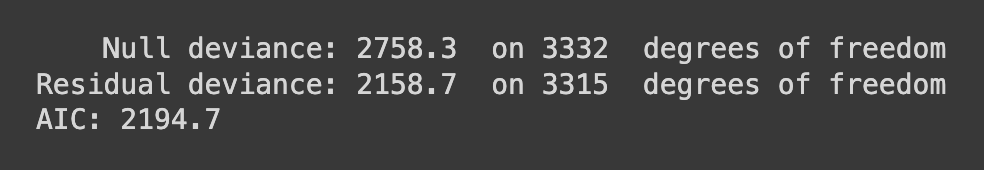


Mientras que el segundo (con vars significativas) obtuvo:
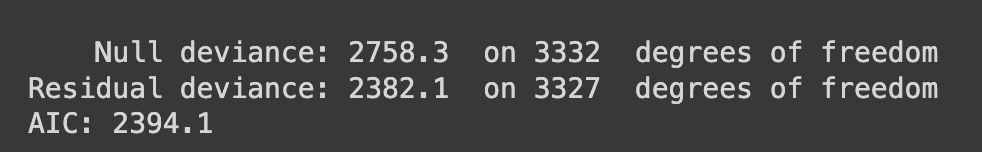

Lo cual que quiere decir que agarrar un modelo completo y quedarnos con todas las vars significativas, no es una buena manera de elegir un modelo. ya que vemos que el segundo modelo que esperabamos que de mejor, nos dio peor en realidad en terminos del AIC

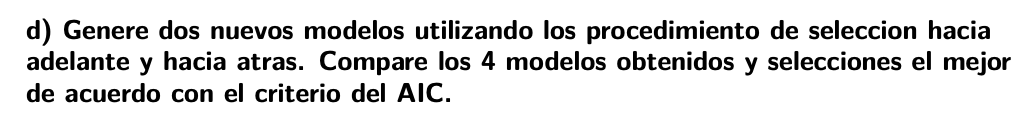

In [24]:
modelo_intercepto <-
  glm(formula = Churn ~ 1, data = datos, family = binomial)
modelo_completo <-
  glm(formula = Churn ~ .,  data = datos, family = binomial)
sm1 <- step(
  object = modelo_completo,
  scope = formula(modelo_completo),
  direction = "backward",
  trace = 2)
summary(sm1)
sm3 <- step(
  object = modelo_intercepto,
  scope = formula(modelo_completo),
  direction = "forward",
  trace = 2)
summary(sm3)


Start:  AIC=2194.72
Churn ~ AccountLength + IntlPlan + VMailPlan + VMailMessage + 
    DayMins + DayCalls + DayCharge + EveMins + EveCalls + EveCharge + 
    NightMins + NightCalls + NightCharge + IntlMins + IntlCalls + 
    IntlCharge + CustServCalls

                Df Deviance    AIC
- DayMins        1   2158.7 2192.7
- DayCharge      1   2158.7 2192.7
- NightMins      1   2158.7 2192.7
- NightCharge    1   2158.8 2192.8
- NightCalls     1   2158.8 2192.8
- EveCalls       1   2158.9 2192.9
- EveCharge      1   2159.0 2193.0
- EveMins        1   2159.0 2193.0
- AccountLength  1   2159.1 2193.1
- IntlMins       1   2159.4 2193.4
- IntlCharge     1   2159.4 2193.4
- DayCalls       1   2160.1 2194.1
<none>               2158.7 2194.7
- VMailMessage   1   2162.7 2196.7
- VMailPlan      1   2172.3 2206.3
- IntlCalls      1   2173.3 2207.3
- CustServCalls  1   2335.7 2369.7
- IntlPlan       1   2348.3 2382.3

Step:  AIC=2192.73
Churn ~ AccountLength + IntlPlan + VMailPlan + VMailMessage + 


Call:
glm(formula = Churn ~ IntlPlan + VMailPlan + VMailMessage + DayCharge + 
    EveMins + NightCharge + IntlCalls + IntlCharge + CustServCalls, 
    family = binomial, data = datos)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -8.067161   0.515870 -15.638  < 2e-16 ***
IntlPlanyes    2.040338   0.145243  14.048  < 2e-16 ***
VMailPlanyes  -2.003234   0.572352  -3.500 0.000465 ***
VMailMessage   0.035262   0.017964   1.963 0.049654 *  
DayCharge      0.076589   0.006371  12.022  < 2e-16 ***
EveMins        0.007182   0.001142   6.290 3.17e-10 ***
NightCharge    0.082547   0.024653   3.348 0.000813 ***
IntlCalls     -0.092176   0.024988  -3.689 0.000225 ***
IntlCharge     0.326138   0.075453   4.322 1.54e-05 ***
CustServCalls  0.512256   0.039141  13.087  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2758.3  on 3332  degrees of freedom
Re

Start:  AIC=2760.29
Churn ~ 1

                Df Deviance    AIC
+ IntlPlan       1   2587.9 2591.9
+ DayMins        1   2614.3 2618.3
+ DayCharge      1   2614.3 2618.3
+ CustServCalls  1   2627.2 2631.2
+ VMailPlan      1   2720.3 2724.3
+ VMailMessage   1   2728.8 2732.8
+ EveMins        1   2729.4 2733.4
+ EveCharge      1   2729.4 2733.4
+ IntlCharge     1   2742.6 2746.6
+ IntlMins       1   2742.6 2746.6
+ IntlCalls      1   2748.5 2752.5
+ NightCharge    1   2754.1 2758.1
+ NightMins      1   2754.1 2758.1
<none>               2758.3 2760.3
+ DayCalls       1   2757.2 2761.2
+ AccountLength  1   2757.4 2761.4
+ EveCalls       1   2758.0 2762.0
+ NightCalls     1   2758.2 2762.2

Step:  AIC=2591.89
Churn ~ IntlPlan

                Df Deviance    AIC
+ CustServCalls  1   2438.2 2444.2
+ DayMins        1   2453.2 2459.2
+ DayCharge      1   2453.2 2459.2
+ VMailPlan      1   2546.0 2552.0
+ VMailMessage   1   2554.9 2560.9
+ EveMins        1   2560.4 2566.4
+ EveCharge      1   


Call:
glm(formula = Churn ~ IntlPlan + CustServCalls + DayMins + VMailPlan + 
    EveMins + IntlCharge + IntlCalls + NightCharge + VMailMessage, 
    family = binomial, data = datos)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -8.067110   0.515868 -15.638  < 2e-16 ***
IntlPlanyes    2.040347   0.145243  14.048  < 2e-16 ***
CustServCalls  0.512254   0.039141  13.087  < 2e-16 ***
DayMins        0.013020   0.001083  12.022  < 2e-16 ***
VMailPlanyes  -2.003222   0.572352  -3.500 0.000465 ***
EveMins        0.007182   0.001142   6.290 3.17e-10 ***
IntlCharge     0.326138   0.075453   4.322 1.54e-05 ***
IntlCalls     -0.092174   0.024988  -3.689 0.000225 ***
NightCharge    0.082546   0.024653   3.348 0.000813 ***
VMailMessage   0.035261   0.017964   1.963 0.049654 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2758.3  on 3332  degrees of freedom
Resi

> Forward agarra solo el intercepto y va sumando variables mientras que bcks va sacando. R decide cual variable agregar o sacar en base a una condicion:

--> Segun la catedra, con el AIC, te va sumando de acuerdo a cual es la var que mas AIC te va generando de manera incremental.

Segun gpt:
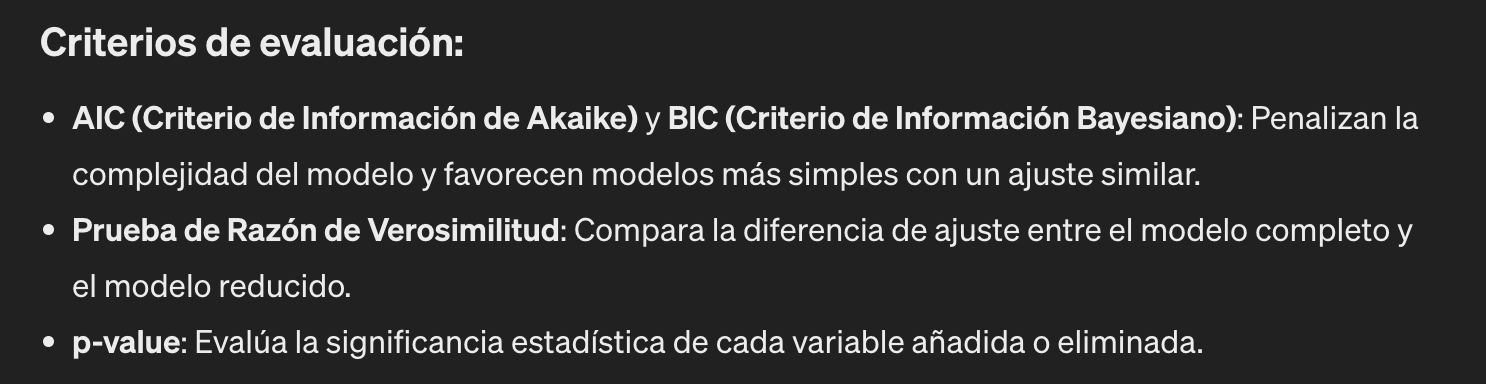

Cuanto mas vars tengamos, mas diferencia suele dar el metodo F vs el metodo Bkwards. pero cuando son pocas vars no suele cambiar mucho el resultado. ambos metodos deberian converger hacia lo mismo.

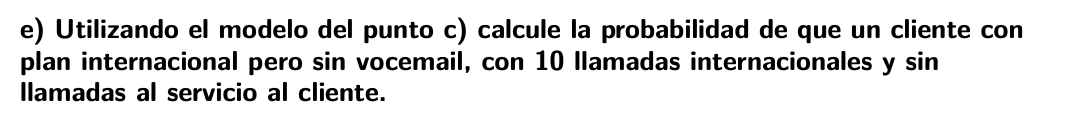

In [25]:
predict_dataset <- data.frame(
  IntlPlan = "yes",
  VMailPlan = "no",
  VMailMessage = 0,
  IntlCalls = 10,
  CustServCalls  = 0)
predict_dataset

IntlPlan,VMailPlan,VMailMessage,IntlCalls,CustServCalls
<chr>,<chr>,<dbl>,<dbl>,<dbl>
yes,no,0,10,0


In [28]:
# Este valor de predicción es de Z = b0 + b1 x1 + b2 x2 + ...
predict(m2, newdata = predict_dataset)
# hacemos la conversión para calcular la probabilidad
1/(1+exp(-predict(m2, newdata = predict_dataset)))


1 
-1.153571

1 
0.2398375

Probabilidad negativa?

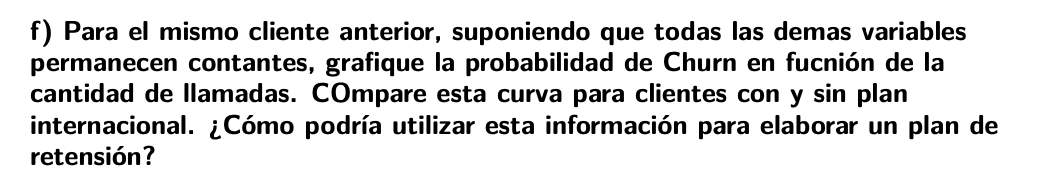

In [ ]:
predict_dataset1 <- data.frame(
  IntlPlan = "yes",
  VMailPlan = "no",
  VMailMessage = 0,
  IntlCalls = 10,
  CustServCalls  = 0:10)
predict_dataset2 <- data.frame(
  IntlPlan = "no",
  VMailPlan = "no",
  VMailMessage = 0,
  IntlCalls = 10,
  CustServCalls  = 0:10)
predict_dataset1
predict_dataset2
predict_dataset1$prediccion_con_plan_int <-
  1/(1+exp(-predict(m2, newdata = predict_dataset1)))
predict_dataset2$prediccion_con_plan_int <-
  1/(1+exp(-predict(m2, newdata = predict_dataset2)))
ggplot()+
  geom_line(aes(CustServCalls, prediccion_con_plan_int),
            color = 'red',
            data = predict_dataset1)+
  geom_line(aes(CustServCalls, prediccion_con_plan_int),
              color = 'blue',
              data = predict_dataset2)+
    ylim(0,1)+
theme_bw()

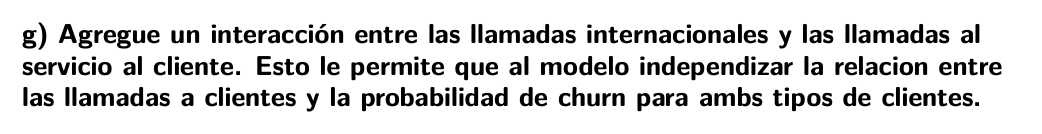

In [ ]:
m5 <- glm(Churn ~ IntlPlan + VMailPlan + VMailMessage + IntlCalls + CustServCalls +
            IntlPlan:CustServCalls,
          data = datos, family = binomial)
summary(m5)
predict_dataset1 <- data.frame(
  IntlPlan = "yes",
  VMailPlan = "no",
  VMailMessage = 0,
  IntlCalls = 10,
  CustServCalls  = 0:10)
predict_dataset2 <- data.frame(
  IntlPlan = "no",
  VMailPlan = "no",
  VMailMessage = 0,
  IntlCalls = 10,
  CustServCalls  = 0:10)
predict_dataset1
predict_dataset2
predict_dataset1$prediccion_con_plan_int <-
  1/(1+exp(-predict(m5, newdata = predict_dataset1)))
predict_dataset2$prediccion_con_plan_int <-
  1/(1+exp(-predict(m5, newdata = predict_dataset2)))
ggplot()+
  geom_line(aes(CustServCalls, prediccion_con_plan_int),
            color = 'red',
            data = predict_dataset1)+
geom_line(aes(CustServCalls, prediccion_con_plan_int),
          color = 'blue',
          data = predict_dataset2)+
ylim(0,1)+
theme_bw()